Accuracy: 1.0


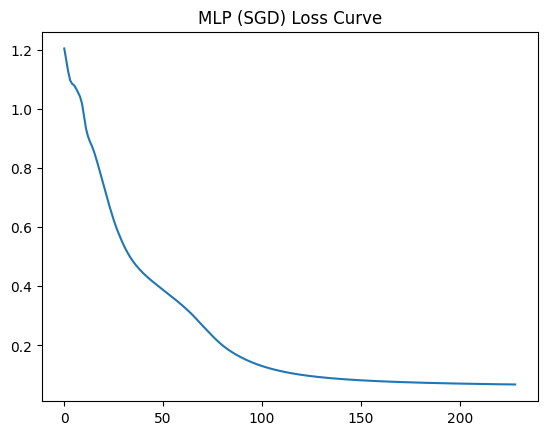

In [ ]:
# SAMPLE 1 — SGD in MLP (Iris Dataset)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='sgd',
    learning_rate_init=0.01,
    momentum=0.9,
    max_iter=500,
    random_state=42
)
mlp_sgd.fit(X_train, y_train)
y_pred = mlp_sgd.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.plot(mlp_sgd.loss_curve_)
plt.title("MLP (SGD) Loss Curve")
plt.show()

In [ ]:
# SAMPLE 2 — Hyperparameter Tuning (GridSearch)
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        max_iter=2000,
        early_stopping=True,
        random_state=42
    ))
])
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (20,), (10,10)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__alpha': [0.0001, 0.001]
}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross Validation Score:", grid.best_score_)

Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (10, 10), 'mlp__learning_rate_init': 0.01}
Best Cross Validation Score: 0.875


In [ ]:
# SAMPLE 3 — Linear SVM (Iris)
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Number of Support Vectors:", svm_model.n_support_)
print("Weights (w):", svm_model.coef_)
print("Bias (b):", svm_model.intercept_)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Number of Support Vectors: [ 3 11 11]
Weights (w): [[-0.04631136  0.52105578 -1.0030165  -0.46411816]
 [-0.00641373  0.17867392 -0.5389119  -0.29158729]
 [ 0.56766907  1.21519237 -2.03626115 -1.70330734]]
Bias (b): [1.45338269 1.50537328 5.8028791 ]


In [ ]:
# Exercise 1 — Hyperparameters for Wisconsin Dataset (MLP)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
data = load_breast_cancer()
X = data.data
y = data.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
mlp = MLPClassifier(
    max_iter=2000,
    early_stopping=True,
    random_state=42
)
param_grid = {
    'hidden_layer_sizes': [(30,), (30,15), (50,25)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001, 0.01]
}
grid = GridSearchCV(mlp, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01}
Test Accuracy: 0.9824561403508771


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv
Saving diabetes.csv to diabetes (1).csv


In [ ]:
# Exercise 2 — Indian Diabetes Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
data = pd.read_csv("diabetes.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
mlp = MLPClassifier(
    max_iter=1000,
    early_stopping=True,
    random_state=42
)
param_grid = {
    'hidden_layer_sizes': [(10,), (20,)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001],
}
grid = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001}
Test Accuracy: 0.8376623376623377


In [ ]:
# Exercise 3 — Linear SVM on Titanic (Survival)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
titanic = pd.read_csv("titanic.csv")
X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])
svm = SVC(kernel='linear', C=1)
pipe = Pipeline([
    ('prep', preprocess),
    ('model', svm)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
# Exercise 4 — Linear SVM on Wisconsin Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Weights shape:", svm_model.coef_.shape)
print("Bias:", svm_model.intercept_)

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Weights shape: (1, 30)
Bias: [-0.06398694]
